In [1]:
import numpy as np
import pandas as pd 
from nltk import tokenize
from nltk.sentiment.util import *
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [2]:
tweets = pd.read_csv("data/tweets.csv")
tweets.head()

text
0                            https://t.co/yfwdyUHmn3
1        More records! #MAGA https://t.co/2CP5eq40Fy
2  RT @PastorDScott: Once the mid terms are over,...
3  RT @GlobalGolfPost: The golf world has lost a ...
4  “FBI texts have revealed anti-Trump Bias.” @Fo...

In [3]:
sid = SentimentIntensityAnalyzer()

tweets['polarity'] = tweets.text.apply(lambda x:sid.polarity_scores(x)['compound'])
tweets['neutrality'] = tweets.text.apply(lambda x:sid.polarity_scores(x)['neu'])
tweets['negativity'] = tweets.text.apply(lambda x:sid.polarity_scores(x)['neg'])
tweets['positivity'] = tweets.text.apply(lambda x:sid.polarity_scores(x)['pos'])
tweets['sentiment'] = ''

tweets.loc[tweets.polarity>0,'sentiment'] = 'positive'
tweets.loc[tweets.polarity==0,'sentiment'] = 'neutral'
tweets.loc[tweets.polarity<0,'sentiment'] = 'negative'

tweets.head()
tweets.to_csv('data/sentiment.csv', index = False)

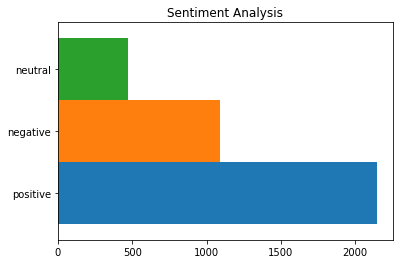

In [5]:
tweets.sentiment.value_counts().plot(kind='barh',title="Sentiment Analysis", width = 1.0)